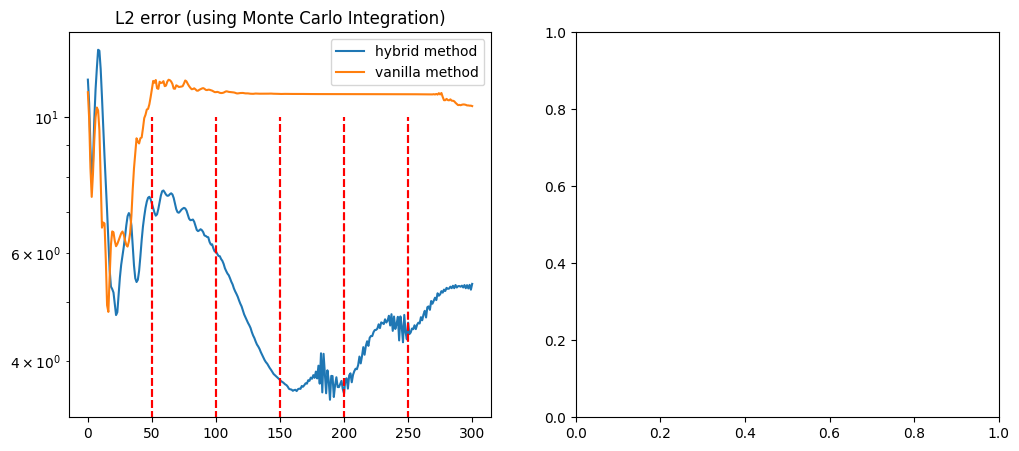

In [2]:
### Plot errors

import torch
import numpy as np
import matplotlib.pyplot as plt

hybrid_error = np.load('hybrid_error.npy')
vanilla_error = np.load('vanilla_error.npy')
#hybrid_loss = np.load('hybrid_loss.npy')
#vanilla_loss = np.load('vanilla_loss.npy')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 5.0])

ax[0].set_title('L2 error (using Monte Carlo Integration)')
ax[0].set_yscale('log')
ax[0].plot( np.arange(301), np.sqrt(hybrid_error))
ax[0].plot(np.arange(301), np.sqrt(vanilla_error))
ax[0].legend(['hybrid method', 'vanilla method'])

ax[0].vlines([50, 100, 150, 200, 250], 0, 10, colors='r', linestyles='dashed')

ax[0].vlines([50, 100, 150, 200, 250], 0, 10, colors='r', linestyles='dashed')



In [6]:
### Plot contours

plot_hybrid = True

if plot_hybrid:
    loadmodel = "hybrid"
else:
    loadmodel = "vanilla"

import torch
import DRLPDE.create as create
import DRLPDE.neuralnets as neuralnets
import DRLPDE.train as train
import DRLPDE.parameters_solver as solver

import examples.hybrid as param

import math
import numpy as np
import matplotlib.pyplot as plt

MyNeuralNetwork = neuralnets.FeedForwardNN

var_nn = {'depth': solver.nn_depth,
        'width': solver.nn_width,
        'x_dim': 2,
        'is_unsteady': False,
        'output_dim': 1
        }

model = MyNeuralNetwork(**var_nn)
model.load_state_dict(torch.load("savedmodels/" + loadmodel + ".pt"))

def polar_eq(theta):
    r = 0.75*torch.cos(theta) + 1.1
    return r

def bdry_con(X):
    ubdry = 4.0*( X[:,0] - 1.0 )**2 - 4.0*( X[:,1] + 0.5 )**2
    return ubdry[:,None]

In [7]:
## Plot points:
import math

## Sample, polar coordinates (r,theta), r = polar_eq

Nth = 60
Nr = 10

theta = torch.linspace(0, 2*math.pi, Nth)
r = torch.zeros(Nth,Nr)

counter = 0
for th in theta:
    r[counter,:] = torch.sqrt( torch.linspace(0,polar_eq(theta[counter]), Nr ) )
    counter += 1

theta = theta[:,None].expand(-1,Nr)

xplot = r*torch.cos(theta)
yplot = r*torch.sin(theta)

X = torch.stack( (r.reshape(Nr*Nth)*torch.cos( theta.reshape(Nr*Nth) ),
                  r.reshape(Nr*Nth)*torch.sin( theta.reshape(Nr*Nth) ) ), dim=1)

U = model(X)
Utrue = bdry_con(X)





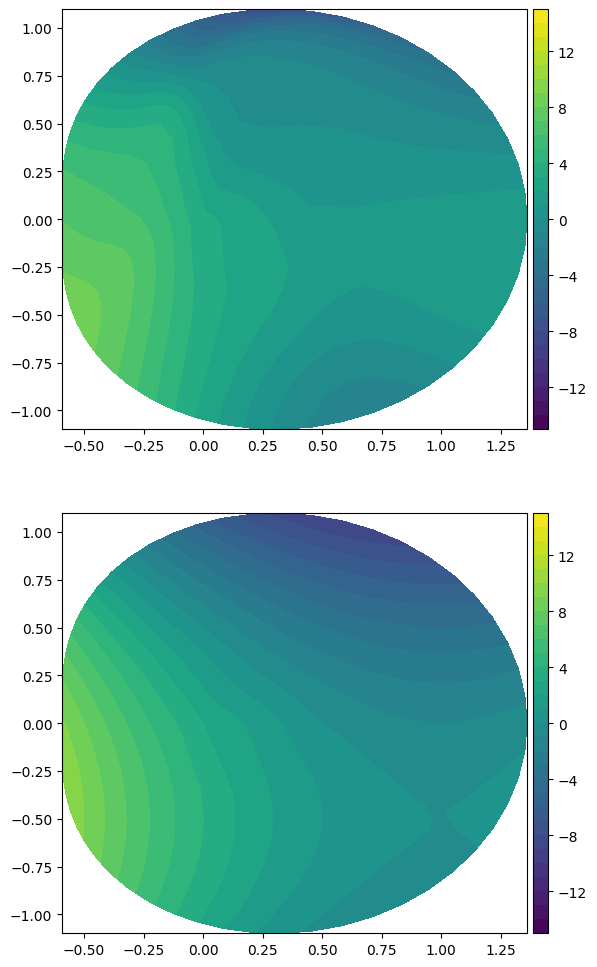

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[6, 12])

levels = np.linspace(-15, 15, 31)
#levels_tick = np.linspace(-10, 10, 5)

c0 = ax[0].contourf(xplot.numpy(), yplot.numpy(), U.detach().reshape(Nth,Nr).numpy(), levels)
colorbar0_param = fig.add_axes(
    [ax[0].get_position().x1 + 0.01,
     ax[0].get_position().y0,
     0.025,
     ax[0].get_position().height])
colorbar0 = plt.colorbar(c0, cax = colorbar0_param)


c1 = ax[1].contourf(xplot.numpy(), yplot.numpy(), Utrue.detach().reshape(Nth,Nr).numpy(), levels)
colorbar0_param = fig.add_axes(
    [ax[1].get_position().x1 + 0.01,
     ax[1].get_position().y0,
     0.025,
     ax[1].get_position().height])
colorbar1 = plt.colorbar(c1, cax = colorbar0_param)
